# `ASSIGNMENT`
- Stream tweets for different sessions - run the stream code for 5 sessions, in a day, create a wordcloud using tweets you had, for each session
- nation, bbc, cnn, harvest data from news media houses websites - to see if it maps with what is current
- also draw a bar chart
 - what is trending currently for the sessions

In [ ]:
import tweepy
import keys

In [ ]:
auth=tweepy.OAuthHandler(keys.consumer_key, keys.consumer_secret)

In [ ]:
auth.set_access_token(keys.access_token,keys.access_token_secret)

In [ ]:
api=tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [ ]:
class StreamListener(tweepy.StreamListener):

    def __init__(self):
        super().__init__()
        self.tweet_count=0
        self.TWEET_LIMIT = 19
    def on_status(self, status):
        #self.tweet_count=0
        #self.TWEET_LIMIT = limit
        print(status.id_str)
        # if "retweeted_status" attribute exists, flag this tweet as a retweet.
        is_retweet = hasattr(status, "retweeted_status")

        # check if text has been truncated
        if hasattr(status,"extended_tweet"):
            text = status.extended_tweet["full_text"]
        else:
            text = status.text

        # check if this is a quote tweet.
        is_quote = hasattr(status, "quoted_status")
        quoted_text = ""
        if is_quote:
            # check if quoted tweet's text has been truncated before recording it
            if hasattr(status.quoted_status,"extended_tweet"):
                quoted_text = status.quoted_status.extended_tweet["full_text"]
            else:
                quoted_text = status.quoted_status.text

        # remove characters that might cause problems with csv encoding
        remove_characters = [",","\n"]
        for c in remove_characters:
            text.replace(c," ")
            quoted_text.replace(c, " ")

        with open("tweet1.txt", "a", encoding='utf-8') as f:
            f.write("%s\n" % (text))
        self.tweet_count += 1
        #return self.tweet_count <= self.TWEET_LIMIT
        if self.tweet_count <= self.TWEET_LIMIT:
            return True
        else:

            return False
    def on_error(self, status_code):
        print("Encountered streaming error (", status_code, ")")
        sys.exit()

if __name__ == "__main__":
    # complete authorization and initialize API endpoint
    auth=tweepy.OAuthHandler(keys.consumer_key, keys.consumer_secret)
    auth.set_access_token(keys.access_token,keys.access_token_secret)
    api=tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)



    # initialize stream
    streamListener = StreamListener()
    stream = tweepy.Stream(auth=api.auth, listener=streamListener,tweet_mode='extended')
    with open("twt.txt", "w", encoding='utf-8') as f:
        f.write("date,user,is_retweet,is_quote,text,quoted_text\n")
    tags = ["Sonko"]
    stream.filter(track=tags)

1339716414786170881
1339716504565248001
1339716652938780673
1339716716465631237
1339716733603631104
1339716740247384069
1339716912490561541
1339717133014609920
1339717144343425024
1339717596376133638
1339717664323870723
1339717692241014787
1339717880418463744
1339718050988371968
1339718119019917313
1339718157489991683
1339718201182175232
1339718258660880384
1339718374977380352
1339718583753043968


In [ ]:
from pathlib import Path
import preprocessor as p
from textblob import TextBlob
from nltk.corpus import stopwords
from operator import itemgetter
from wordcloud import WordCloud
import pandas as pd


In [ ]:
t_text= Path('twt.txt').read_text(errors='ignore')

In [ ]:
#all Preprocessor options enabled
p.set_options(p.OPT.URL,p.OPT.EMOJI,p.OPT.NUMBER, p.OPT.RESERVED, p.OPT.MENTION, p.OPT.SMILEY, p.OPT.HASHTAG)

In [ ]:
clean_t_text=p.clean(t_text)

In [ ]:
t_blob=TextBlob(clean_t_text)

In [ ]:
t_items=t_blob.word_counts.items()

In [ ]:
t_stop_words=stopwords.words('english')

In [ ]:
t_stopwords_list = ['RT','ðÿ‡¬ðÿ‡§ðÿ‡ºðÿ‡¸	','ukâ€	','“','rt','date,user,is_retweet,is_quote,text,quoted_text','@','United','Kingdom']
t_stop_words.extend(t_stopwords_list)

In [ ]:
#elimiate stop words
t_items =[item for item in t_items if item[0] not in t_stop_words]

In [ ]:
t_sorted_items=sorted(t_items, key=itemgetter(1), reverse=True)

In [ ]:
t_top=t_sorted_items[:20]

In [ ]:
t_df=pd.DataFrame(t_top, columns=['words','count'])

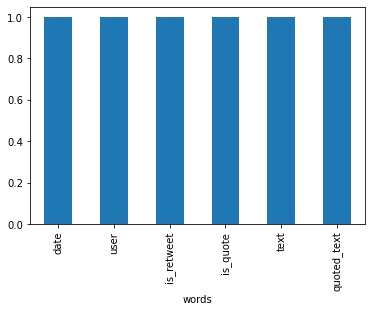

In [ ]:
axes=t_df.plot.bar(x='words',y='count', legend=False)

In [ ]:
t_tuples = [tuple(x) for x in t_df.values]

In [ ]:
t_wordcloud = WordCloud(width = 2000, height= 2000, prefer_horizontal=0.5, min_font_size=10, colormap='prism', background_color='white').generate_from_frequencies(dict(t_tuples))

In [ ]:
t_wordcloud = t_wordcloud.to_file('t1.png')

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

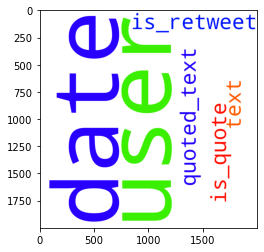

In [ ]:
plt.imshow(t_wordcloud)

# Comparing Twitter to a media house
 - Here, I will compare it to Nation Media House

In [ ]:
import requests

In [ ]:
response = requests.get('https://www.nationmedia.com/')

In [ ]:
response.content #gives html page

b'\r\n\r\n<!DOCTYPE html>\r\n<html lang="en">\r\n    <head>\r\n        <meta charset="utf-8">\r\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n        <meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=yes">\r\n        <meta name="description" content="The Nation Media Group - The Nation Media Group is the largest independent media house in East and Central Africa with operations in print, broadcast and digital media.">\r\n        <meta http-equiv="cleartype" content="on">\r\n        <title>Home - The Nation Media Group</title>\n\n<!-- This site is optimized with the Yoast SEO plugin v4.9 - https://yoast.com/wordpress/plugins/seo/ -->\n<link rel="canonical" href="https://www.nationmedia.com/" />\n<meta property="og:locale" content="en_US" />\n<meta property="og:type" content="website" />\n<meta property="og:title" content="Home - The Nation Media Group" />\n<meta property="og:url" content="https://www.nationmedia.com/" />\n<meta prope

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(response.content, 'html5lib')

In [ ]:
nation_text = soup.get_text(strip=True)

In [ ]:
nation_blob = TextBlob(nation_text)

In [ ]:
nation_items = nation_blob.word_counts.items()

In [ ]:
nation_stopwords = stopwords.words('english')

In [ ]:
nation_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#elimiate stop words
nation_items =[item for item in nation_items if item[0] not in nation_stopwords]

In [ ]:
nation_sorted_items=sorted(nation_items, key=itemgetter(1), reverse=True)

In [ ]:
nation_sorted_items[len(nation_sorted_items)-1]

('robot', 1)

In [ ]:
# limiting the array to  15 items
nation_top15=nation_sorted_items[:15]

In [ ]:
nation_df=pd.DataFrame(nation_top15, columns=['words','count'])

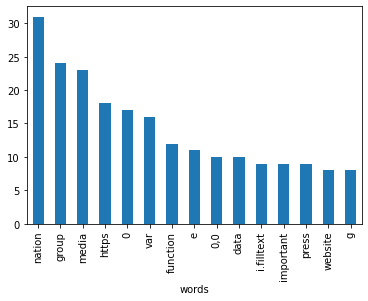

In [ ]:
axes=nation_df.plot.bar(x='words',y='count', legend=False)